In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from time import time

from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LinearRegression
from sklearn.model_selection import cross_val_score

from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import math
df = pd.read_csv('../data/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1920 non-null   int64  
 1   Substrate  1920 non-null   object 
 2   Ceramic    1920 non-null   object 
 3   Thickness  1920 non-null   float64
 4   Lsub       1920 non-null   float64
 5   asub       1920 non-null   float64
 6   bsub       1920 non-null   float64
 7   Lcer       1920 non-null   float64
 8   acer       1920 non-null   float64
 9   bcer       1920 non-null   float64
 10  L          1920 non-null   float64
 11  a          1920 non-null   float64
 12  b          1920 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 195.1+ KB


In [9]:
from sklearn.utils import all_estimators

estimators = all_estimators(type_filter='regressor')

all_regs = []
for name, RegressorClass in estimators:
    try:
        print('Appending', name)
        reg = RegressorClass()
        all_regs.append(reg)
    except Exception as e:
        print(e)

Appending ARDRegression
Appending AdaBoostRegressor
Appending BaggingRegressor
Appending BayesianRidge
Appending CCA
Appending DecisionTreeRegressor
Appending DummyRegressor
Appending ElasticNet
Appending ElasticNetCV
Appending ExtraTreeRegressor
Appending ExtraTreesRegressor
Appending GammaRegressor
Appending GaussianProcessRegressor
Appending GradientBoostingRegressor
Appending HistGradientBoostingRegressor
Appending HuberRegressor
Appending IsotonicRegression
Appending KNeighborsRegressor
Appending KernelRidge
Appending Lars
Appending LarsCV
Appending Lasso
Appending LassoCV
Appending LassoLars
Appending LassoLarsCV
Appending LassoLarsIC
Appending LinearRegression
Appending LinearSVR
Appending MLPRegressor
Appending MultiOutputRegressor
__init__() missing 1 required positional argument: 'estimator'
Appending MultiTaskElasticNet
Appending MultiTaskElasticNetCV
Appending MultiTaskLasso
Appending MultiTaskLassoCV
Appending NuSVR
Appending OrthogonalMatchingPursuit
Appending OrthogonalM

In [10]:
all_regs

[ARDRegression(),
 AdaBoostRegressor(),
 BaggingRegressor(),
 BayesianRidge(),
 CCA(),
 DecisionTreeRegressor(),
 DummyRegressor(),
 ElasticNet(),
 ElasticNetCV(),
 ExtraTreeRegressor(),
 ExtraTreesRegressor(),
 GammaRegressor(),
 GaussianProcessRegressor(),
 GradientBoostingRegressor(),
 HistGradientBoostingRegressor(),
 HuberRegressor(),
 IsotonicRegression(),
 KNeighborsRegressor(),
 KernelRidge(),
 Lars(),
 LarsCV(),
 Lasso(),
 LassoCV(),
 LassoLars(),
 LassoLarsCV(),
 LassoLarsIC(),
 LinearRegression(),
 LinearSVR(),
 MLPRegressor(),
 MultiTaskElasticNet(),
 MultiTaskElasticNetCV(),
 MultiTaskLasso(),
 MultiTaskLassoCV(),
 NuSVR(),
 OrthogonalMatchingPursuit(),
 OrthogonalMatchingPursuitCV(),
 PLSCanonical(),
 PLSRegression(),
 PassiveAggressiveRegressor(),
 PoissonRegressor(),
 QuantileRegressor(),
 RANSACRegressor(),
 RadiusNeighborsRegressor(),
 RandomForestRegressor(),
 Ridge(),
 RidgeCV(alphas=array([ 0.1,  1. , 10. ])),
 SGDRegressor(),
 SVR(),
 TheilSenRegressor(max_subpopu

In [11]:
all_regs_drop = pd.Series(all_regs)
all_regs_drop = all_regs_drop.drop(index = [0, 1, 3, 8, 11, 13, 14, 15, 16, 20, 22, 24, 25, 27, 33, 35, 38, 39, 40, 46, 47, 48, 50])
all_regs_drop

2                            BaggingRegressor()
4                                         CCA()
5                       DecisionTreeRegressor()
6                              DummyRegressor()
7                                  ElasticNet()
9                          ExtraTreeRegressor()
10                        ExtraTreesRegressor()
12                   GaussianProcessRegressor()
17                        KNeighborsRegressor()
18                                KernelRidge()
19                                       Lars()
21                                      Lasso()
23                                  LassoLars()
26                           LinearRegression()
28                               MLPRegressor()
29                        MultiTaskElasticNet()
30                      MultiTaskElasticNetCV()
31                             MultiTaskLasso()
32                           MultiTaskLassoCV()
34                  OrthogonalMatchingPursuit()
36                               PLSCano

In [12]:
###Predict L
X, y = df[['Thickness','Lsub', 'asub','bsub', 'Lcer', 'acer', 'bcer']], df[['L', 'a', 'b']]

#Perform Scaling if needed
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#Defining Regressors

regressors = all_regs_drop

#Testing Models
for model in regressors:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", np.round(explained_variance_score(y_test, y_pred), decimals=3))
    print("\tMean absolute error:", np.round(mean_absolute_error(y_test, y_pred), decimals =3))
    print("\tR2 score:", np.round(r2_score(y_test, y_pred), decimals = 3))
    print()

BaggingRegressor()
	Training time: 0.022s
	Prediction time: 0.003s
	Explained variance: 0.998
	Mean absolute error: 0.244
	R2 score: 0.998

CCA()
	Training time: 0.009s
	Prediction time: 0.001s
	Explained variance: 0.657
	Mean absolute error: 3.349
	R2 score: 0.657

DecisionTreeRegressor()
	Training time: 0.003s
	Prediction time: 0.001s
	Explained variance: 0.998
	Mean absolute error: 0.242
	R2 score: 0.998

DummyRegressor()
	Training time: 0.001s
	Prediction time: 0.000s
	Explained variance: 0.0
	Mean absolute error: 5.985
	R2 score: -0.002

ElasticNet()
	Training time: 0.004s
	Prediction time: 0.001s
	Explained variance: 0.851
	Mean absolute error: 1.634
	R2 score: 0.851

ExtraTreeRegressor()
	Training time: 0.004s
	Prediction time: 0.001s
	Explained variance: 0.998
	Mean absolute error: 0.242
	R2 score: 0.998

ExtraTreesRegressor()
	Training time: 0.104s
	Prediction time: 0.010s
	Explained variance: 0.998
	Mean absolute error: 0.242
	R2 score: 0.998

GaussianProcessRegressor()
	Trai

In [60]:
df_temp = pd.DataFrame({'Model': [],
        'Train Time': [],
        'Prediction time' : [],
        'Explained variance':[], 
        'Mean absolute error':[],
        'R2 score':[]})

for model in regressors:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start
    
    new_row = pd.DataFrame({'Model': str(model),
                            'Train Time': train_time,
                            'Prediction time' : predict_time,
                            'Explained variance': explained_variance_score(y_test, y_pred),
                            'Mean absolute error': mean_absolute_error(y_test, y_pred),
                            'R2 score':r2_score(y_test, y_pred)}, index = [0])
    
    df_temp = pd.concat((df_temp, new_row))
    df_models = np.round(pd.DataFrame(df_temp), decimals = 3)

In [61]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_models.sort_values(['Mean absolute error','R2 score', 'Train Time']).head(10)

,Model,Train Time,Prediction time,Explained variance,Mean absolute error,R2 score
0,DecisionTreeRegressor(),0.003,0.001,0.998,0.242,0.998
0,ExtraTreeRegressor(),0.004,0.002,0.998,0.242,0.998
0,GaussianProcessRegressor(),0.094,0.017,0.998,0.242,0.998
0,ExtraTreesRegressor(),0.104,0.010,0.998,0.242,0.998
0,RandomForestRegressor(),0.145,0.013,0.998,0.242,0.998
0,BaggingRegressor(),0.023,0.003,0.998,0.243,0.998
0,KNeighborsRegressor(),0.002,0.003,0.998,0.254,0.998
0,MLPRegressor(),0.854,0.001,0.914,1.245,0.914
0,LinearRegression(),0.002,0.001,0.895,1.464,0.894
0,Ridge(),0.002,0.001,0.895,1.464,0.894


In [62]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

model score on training data: 0.9978524348188788
model score on testing data: 0.9978259171901587


In [63]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS

num_of_features = []
pipe = model

for i in range (1, 7):
    sfs = SFS(pipe,
         n_features_to_select= i,
         direction='forward',
         scoring='r2',
         n_jobs=3,
         cv=5)
    sfs.fit(X_train, y_train)
    features = sfs.get_support(indices=True)
    X.iloc[:, features]
    
    r2_train = cross_val_score(pipe, X_train.iloc[:, features], y_train, scoring="r2", cv=5)
    mean_r2_train = np.mean(r2_train)
    
    r2_test = cross_val_score(pipe, X_test.iloc[:, features], y_test, scoring="r2", cv=5)
    mean_r2_test = np.mean(r2_test)
    
    mse_train = cross_val_score(pipe, X_train.iloc[:, features], y_train, scoring="neg_mean_squared_error", cv=5)
    mean_mse_train = np.mean(mse_train)
    
    mse_test = cross_val_score(pipe, X_test.iloc[:, features], y_test, scoring="neg_mean_squared_error", cv=5)
    mean_mse_test = np.mean(mse_test)
    
    mae_train = cross_val_score(pipe, X_train.iloc[:, features], y_train, scoring="neg_mean_absolute_error", cv=5)
    mean_mae_train = np.mean(mae_train)
    
    mae_test = cross_val_score(pipe, X_test.iloc[:, features], y_test, scoring="neg_mean_absolute_error", cv=5)
    mean_mae_test = np.mean(mae_test)
    
    d = {'n_features': i, 'R2_train': mean_r2_train, 'R2_test': mean_r2_test, 'MSE_train': mean_mse_train, 
         'MSE_test': mean_mse_test, 'MAE_train': mean_mae_train, 'MAE_test': mean_mae_test} 
    num_of_features.append(d)

In [64]:
n_features_data = pd.DataFrame(num_of_features)
n_features_data

,n_features,R2_train,R2_test,MSE_train,MSE_test,MAE_train,MAE_test
0,1,0.821,0.823,-9.440,-10.257,-1.971,-2.010
1,2,0.918,0.919,-3.140,-3.348,-1.274,-1.307
2,3,0.998,0.997,-0.141,-0.200,-0.243,-0.275
3,4,0.998,0.997,-0.141,-0.200,-0.243,-0.275
4,5,0.998,0.997,-0.141,-0.200,-0.243,-0.275
5,6,0.998,0.997,-0.141,-0.200,-0.243,-0.275


In [65]:
from time import time

dt = DecisionTreeRegressor()
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': list(range(1,30)),
    'min_samples_leaf': list(range(1,100)),
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=10, n_jobs=-1, verbose=1, scoring = "neg_mean_squared_error")

In [66]:
%%time
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 11484 candidates, totalling 114840 fits
CPU times: user 1min 16s, sys: 5.02 s, total: 1min 21s
Wall time: 6min 31s


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             scoring='neg_mean_squared_error', verbose=1)

In [67]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.sort_values(by='rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
4366,0.005,0.001,0.003,0.000,friedman_mse,16,11,"{'criterion': 'friedman_mse', 'max_depth': 16,...",-0.111,-0.143,...,-0.156,-0.160,-0.153,-0.135,-0.122,-0.149,-0.121,-0.141,0.017,1
1885,0.006,0.001,0.004,0.001,squared_error,20,5,"{'criterion': 'squared_error', 'max_depth': 20...",-0.111,-0.143,...,-0.156,-0.160,-0.153,-0.135,-0.122,-0.149,-0.121,-0.141,0.017,2
4567,0.005,0.000,0.004,0.002,friedman_mse,18,14,"{'criterion': 'friedman_mse', 'max_depth': 18,...",-0.111,-0.143,...,-0.156,-0.160,-0.153,-0.135,-0.122,-0.149,-0.121,-0.141,0.017,3
4653,0.006,0.002,0.004,0.001,friedman_mse,19,1,"{'criterion': 'friedman_mse', 'max_depth': 19,...",-0.111,-0.143,...,-0.156,-0.160,-0.153,-0.135,-0.122,-0.149,-0.121,-0.141,0.017,3
4958,0.005,0.001,0.003,0.000,friedman_mse,22,9,"{'criterion': 'friedman_mse', 'max_depth': 22,...",-0.111,-0.143,...,-0.156,-0.160,-0.153,-0.135,-0.122,-0.149,-0.121,-0.141,0.017,3


In [68]:
best = grid_search.best_params_
best

{'criterion': 'friedman_mse', 'max_depth': 16, 'min_samples_leaf': 11}

In [13]:
model = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 16, min_samples_leaf = 11)

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

model score on training data: 0.9978524348188788
model score on testing data: 0.9978259171901587


   Thickness  Lsub  asub  bsub  Lcer  acer  bcer
0      0.069 0.263 0.632 0.007 0.011 0.013 0.005


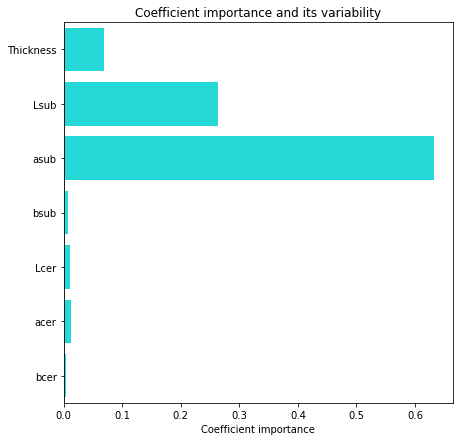

In [70]:
#Check features importance
fi = pd.DataFrame(model.feature_importances_, index = ['Thickness', 'Lsub', 'asub','bsub', 'Lcer', 'acer', 'bcer']).transpose()
print(fi.round(3))

#Plot Feature importance
plt.figure(figsize=(9, 7))
sns.barplot(data=fi, orient='h', color='cyan', saturation=0.7)
plt.axvline(x=0, color='.5')
plt.xlabel('Coefficient importance')
plt.title('Coefficient importance and its variability')
plt.subplots_adjust(left=.3)

In [71]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.round(fi, decimals =2)

,Thickness,Lsub,asub,bsub,Lcer,acer,bcer
0,0.07,0.26,0.63,0.01,0.01,0.01,0.00


[Text(0.6440135542168675, 0.95, 'asub <= 5.471\nfriedman_mse = 94.957\nsamples = 1536\nvalue = [[68.001]\n[0.693]\n[8.522]]'),
 Text(0.42055722891566266, 0.85, 'Lsub <= 84.29\nfriedman_mse = 40.384\nsamples = 1160\nvalue = [[74.745]\n[1.229]\n[12.064]]'),
 Text(0.23042168674698796, 0.75, 'bsub <= 12.845\nfriedman_mse = 3.859\nsamples = 771\nvalue = [[67.781]\n[1.279]\n[10.837]]'),
 Text(0.11295180722891567, 0.65, 'acer <= 0.272\nfriedman_mse = 2.596\nsamples = 388\nvalue = [[69.76]\n[1.009]\n[10.906]]'),
 Text(0.04819277108433735, 0.55, 'Thickness <= 0.6\nfriedman_mse = 0.7\nsamples = 90\nvalue = [[69.814]\n[0.749]\n[8.596]]'),
 Text(0.024096385542168676, 0.45, 'Thickness <= 0.4\nfriedman_mse = 0.1\nsamples = 48\nvalue = [[70.991]\n[0.812]\n[8.409]]'),
 Text(0.012048192771084338, 0.35, 'friedman_mse = 0.056\nsamples = 24\nvalue = [[71.078]\n[0.836]\n[8.724]]'),
 Text(0.03614457831325301, 0.35, 'friedman_mse = 0.073\nsamples = 24\nvalue = [[70.903]\n[0.789]\n[8.094]]'),
 Text(0.07228915

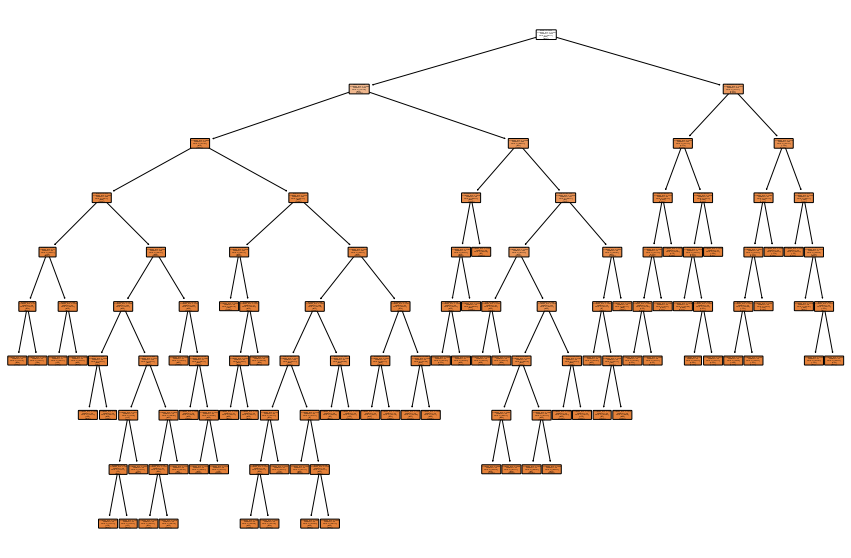

In [72]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(15, 10))
plot_tree(model,
          feature_names=['Thickness', 'Lsub', 'asub','bsub', 'Lcer', 'acer', 'bcer'], 
          filled=True, impurity=True, 
          rounded=True)

In [73]:
fig.savefig('../images/decisiontreeLab.pdf', figsize=(150, 100))

In [74]:
pred = pd.DataFrame(model.predict(X_test), columns=['Lpred','apred','bpred'])

In [75]:
pred

,Lpred,apred,bpred
0,72.18,0.70,9.02
1,69.38,1.12,12.80
2,43.57,-0.88,-3.18
3,53.21,-1.33,-2.50
4,67.23,1.75,14.66
...,...,...,...
379,65.04,1.86,12.54
380,94.78,-0.01,6.95
381,70.90,0.79,8.09
382,87.10,1.64,17.84


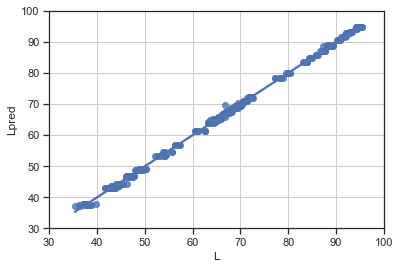

In [76]:
sns.set(style="ticks")
sns.regplot(y_test['L'], pred[['Lpred']])
#control x and y limits
plt.ylim(30, 100)
plt.xlim(30, 100)
plt.grid()
 
plt.show()

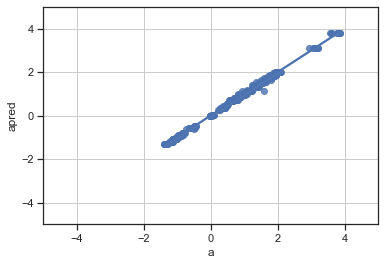

In [77]:
sns.set(style="ticks")
sns.regplot(y_test['a'], pred[['apred']])
#control x and y limits
plt.ylim(-5, 5)
plt.xlim(-5, 5)
plt.grid()
 
plt.show()

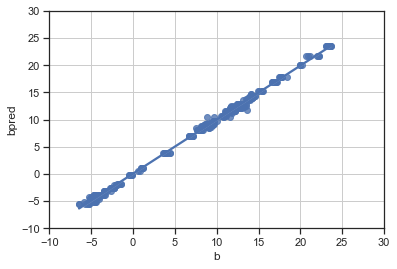

In [80]:
sns.set(style="ticks")
sns.regplot(y_test['b'], pred[['bpred']])
#control x and y limits
plt.ylim(-10, 30)
plt.xlim(-10, 30)
plt.grid()
 
plt.show()

In [81]:
predL = pred[['Lpred']].to_numpy()
yL = y_test['L'].reset_index()
yL = yL.drop(columns='index').to_numpy()
APE = pd.DataFrame(100*(abs(yL - predL)/yL), columns=[['APE']])
APE

,APE
0,0.13
1,0.60
2,0.77
3,1.89
4,0.52
...,...
379,0.65
380,0.28
381,0.29
382,0.56


In [86]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
APE.mean()

APE   0.685
dtype: float64

In [87]:
APE.max()

APE   4.841
dtype: float64

In [88]:
APE.std()

APE   0.729
dtype: float64

In [2]:
Lsub = np.arange(0, 100).tolist()
asub = np.arange(-10, 11).tolist()
bsub = np.arange(-25, 26).tolist()
Lcer = np.arange(0, 100).tolist()
acer = np.arange(-10, 11).tolist()
bcer = np.arange(-25, 26).tolist()
thickness = np.arange(0, 5, 0.1).tolist()

In [ ]:
from  itertools import product

Lsub = np.arange(0, 100).tolist()
asub = np.arange(-10, 11).tolist()
bsub = np.arange(-25, 26).tolist()
Lcer = np.arange(0, 100).tolist()
acer = np.arange(-10, 11).tolist()
bcer = np.arange(-25, 26).tolist()
thickness = np.arange(0, 5, 0.1).tolist()


df = pd.DataFrame(product(Lsub, asub, bsub, Lcer, acer, bcer, thickness), columns = ['Lsub','asub', 'bsub', 'Lcer','acer', 'bcer', 'thickness'])


In [111]:
df

,Lsub,asub,bsub,Lcer,acer,bcer,thickness
0,11.000,11.000,11.000,11.000,11.000,11.000,11.000
1,11.000,11.000,11.000,11.000,11.000,11.000,11.500
2,11.000,11.000,11.000,11.000,11.000,11.000,12.000
3,11.000,11.000,11.000,11.000,11.000,11.000,12.500
4,11.000,11.000,11.000,11.000,11.000,11.000,13.000
...,...,...,...,...,...,...,...
35831803,16.500,16.500,16.500,16.500,16.500,16.500,14.500
35831804,16.500,16.500,16.500,16.500,16.500,16.500,15.000
35831805,16.500,16.500,16.500,16.500,16.500,16.500,15.500
35831806,16.500,16.500,16.500,16.500,16.500,16.500,16.000


In [14]:
import gradio as gr

def greet(Thickness, Lsub, asub, bsub, Lcer, acer, bcer):
    list = [Thickness, Lsub, asub, bsub, Lcer, acer, bcer]
    df2 = pd.DataFrame(list).T
    output = model.predict(df2)
    Lf = pd.DataFrame(output, columns = ['L', 'a', 'b'])._get_value(0, 'L')
    af = pd.DataFrame(output, columns = ['L', 'a', 'b'])._get_value(0, 'a')
    bf = pd.DataFrame(output, columns = ['L', 'a', 'b'])._get_value(0, 'b')
    return Lf, af, bf

demo = gr.Interface(fn=greet, inputs=[gr.Slider(0, 1.5, 0.1),
                                      gr.Slider(50, 100, 1),
                                      gr.Slider(-10, 10, 0.2),
                                      gr.Slider(-20, 20, 0.2),
                                      gr.Slider(0, 100, 1),
                                      gr.Slider(-10, 10, 0.2),
                                      gr.Slider(-20, 20, 0.2)], outputs=["number","number", "number"])
demo.launch()

Running on local URL:  http://127.0.0.1:7892

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x7f92804b3130>, 'http://127.0.0.1:7892/', None)